# Working with date time

In [1]:
import pandas as pd
df = pd.read_csv('http://bit.ly/uforeports')

In [2]:
df.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


In [3]:
df.dtypes

City               object
Colors Reported    object
Shape Reported     object
State              object
Time               object
dtype: object

In [4]:
df['Time'] = pd.to_datetime(df.Time)

In [5]:
ts = pd.to_datetime('1/1/1999')

In [6]:
df.loc[df.Time >= ts, :]

,City,Colors Reported,Shape Reported,State,Time
12832,Loma Rica,NaN,LIGHT,CA,1999-01-01 02:30:00
12833,Bauxite,NaN,NaN,AR,1999-01-01 03:00:00
12834,Florence,NaN,CYLINDER,SC,1999-01-01 14:00:00
12835,Lake Henshaw,NaN,CIGAR,CA,1999-01-01 15:00:00
12836,Wilmington Island,NaN,LIGHT,GA,1999-01-01 17:15:00
...,...,...,...,...,...
18236,Grant Park,NaN,TRIANGLE,IL,2000-12-31 23:00:00
18237,Spirit Lake,NaN,DISK,IA,2000-12-31 23:00:00
18238,Eagle River,NaN,NaN,WI,2000-12-31 23:45:00
18239,Eagle River,RED,LIGHT,WI,2000-12-31 23:45:00


In [7]:
df.Time.max() - df.Time.min()

Timedelta('25781 days 01:59:00')

In [8]:
(df.Time.max() - df.Time.min()).days

25781

In [9]:
(df.Time.max() - df.Time.min()).days / 365

70.63287671232877

Plot number of UFOs seen per year

In [10]:
import matplotlib.pyplot as plt
%matplotlib inline

In [11]:
df['Time'] = df.Time.dt.year

In [12]:
df.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,1930
1,Willingboro,NaN,OTHER,NJ,1930
2,Holyoke,NaN,OVAL,CO,1931
3,Abilene,NaN,DISK,KS,1931
4,New York Worlds Fair,NaN,LIGHT,NY,1933


In [13]:
df.groupby(['Time']).count().reset_index()

,Time,City,Colors Reported,Shape Reported,State
0,1930,2,0,2,2
1,1931,2,0,2,2
2,1933,1,0,1,1
3,1934,1,0,1,1
4,1935,1,0,1,1
...,...,...,...,...,...
63,1996,848,155,510,851
64,1997,1236,226,1138,1237
65,1998,1741,391,1643,1743
66,1999,2774,551,2511,2774


In [14]:
#df.Time.value_counts().sort_values().reset_index()

<AxesSubplot:>

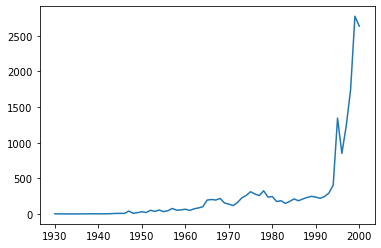

In [15]:
df.Time.value_counts().sort_index().plot() # takes index as x axis

# Find and remove duplicates

In [16]:
# movie reviewer dataset
user_cols=['user_id', 'age', 'gender', 'occupation', 'zip_code']
df = pd.read_csv('http://bit.ly/movieusers', sep='|', header=None, names=user_cols, na_filter=False, index_col='user_id') 
#na_filter = False will drop rows with Na values

In [17]:
df.shape

(943, 4)

In [18]:
df.zip_code.duplicated()   # Returns False if unique and True if same value appeared before

user_id
1      False
2      False
3      False
4      False
5      False
       ...  
939    False
940     True
941    False
942    False
943    False
Name: zip_code, Length: 943, dtype: bool

In [19]:
df[df['zip_code'].duplicated()==True]  

(795, 4)

In [20]:
df[df.duplicated()==False].shape  # If entire row as same value as row appeared before

(936, 4)

In [21]:
# How many duplicate zip codes   ---> 148 duplicated zip codes  True -> 1 False -> 0
df.zip_code.duplicated().sum()

148

In [22]:
df.duplicated()  # will return True if entire row is identical to previous row

user_id
1      False
2      False
3      False
4      False
5      False
       ...  
939    False
940    False
941    False
942    False
943    False
Length: 943, dtype: bool

In [23]:
# Return duplicate rows    Return when value is True
df.loc[df.duplicated(), :]

,age,gender,occupation,zip_code
user_id,,,,
496,21,F,student,55414
572,51,M,educator,20003
621,17,M,student,60402
684,28,M,student,55414
733,44,F,other,60630
805,27,F,other,20009
890,32,M,student,97301


In [24]:
df.loc[df.duplicated(keep='first'), :] 
# mark duplicates as True except the first occurence
# The first occurence gets kept and all the others in the dataframe gets identified as True

,age,gender,occupation,zip_code
user_id,,,,
496,21,F,student,55414
572,51,M,educator,20003
621,17,M,student,60402
684,28,M,student,55414
733,44,F,other,60630
805,27,F,other,20009
890,32,M,student,97301


In [25]:
df.loc[df.duplicated(keep='last'), :] 

,age,gender,occupation,zip_code
user_id,,,,
67,17,M,student,60402
85,51,M,educator,20003
198,21,F,student,55414
350,32,M,student,97301
428,28,M,student,55414
437,27,F,other,20009
460,44,F,other,60630


In [26]:
df.loc[df.duplicated(keep=False), :]  # Mark all duplicates as True even the first occurence

,age,gender,occupation,zip_code
user_id,,,,
67,17,M,student,60402
85,51,M,educator,20003
198,21,F,student,55414
350,32,M,student,97301
428,28,M,student,55414
437,27,F,other,20009
460,44,F,other,60630
496,21,F,student,55414
572,51,M,educator,20003


In [27]:
df.drop_duplicates(keep='first') #keep='first' <- default setting

,age,gender,occupation,zip_code
user_id,,,,
1,24,M,technician,85711
2,53,F,other,94043
3,23,M,writer,32067
4,24,M,technician,43537
5,33,F,other,15213
...,...,...,...,...
939,26,F,student,33319
940,32,M,administrator,02215
941,20,M,student,97229


### What if you only wanted to consider certain columns when identifying duplicates?
#### Example: age+zip code is unique identifier

In [28]:
df.duplicated(subset=['age','zip_code']).sum()

16

In [29]:
df.drop_duplicates(subset=['age','zip_code'],inplace=True)

# How to handle missing values?

In [30]:
df = pd.read_csv('http://bit.ly/uforeports')

In [31]:
df.tail()

,City,Colors Reported,Shape Reported,State,Time
18236,Grant Park,NaN,TRIANGLE,IL,12/31/2000 23:00
18237,Spirit Lake,NaN,DISK,IA,12/31/2000 23:00
18238,Eagle River,NaN,NaN,WI,12/31/2000 23:45
18239,Eagle River,RED,LIGHT,WI,12/31/2000 23:45
18240,Ybor,NaN,OVAL,FL,12/31/2000 23:59


In [32]:
# isnull() dataframe method
df.isnull().tail()

,City,Colors Reported,Shape Reported,State,Time
18236,False,True,False,False,False
18237,False,True,False,False,False
18238,False,True,True,False,False
18239,False,False,False,False,False
18240,False,True,False,False,False


In [33]:
df.notnull().tail()

,City,Colors Reported,Shape Reported,State,Time
18236,True,False,True,True,True
18237,True,False,True,True,True
18238,True,False,False,True,True
18239,True,True,True,True,True
18240,True,False,True,True,True


In [34]:
df.isnull().sum()  
#axis=0 do sum accross the rows means sum values for each column 

City                  25
Colors Reported    15359
Shape Reported      2644
State                  0
Time                   0
dtype: int64

In [35]:
df[df.City.isnull()].head()

,City,Colors Reported,Shape Reported,State,Time
21,NaN,NaN,NaN,LA,8/15/1943 0:00
22,NaN,NaN,LIGHT,LA,8/15/1943 0:00
204,NaN,NaN,DISK,CA,7/15/1952 12:30
241,NaN,BLUE,DISK,MT,7/4/1953 14:00
613,NaN,NaN,DISK,NV,7/1/1960 12:00


In [36]:
df.isna().sum()

City                  25
Colors Reported    15359
Shape Reported      2644
State                  0
Time                   0
dtype: int64

In [37]:
df.isnull().sum()

City                  25
Colors Reported    15359
Shape Reported      2644
State                  0
Time                   0
dtype: int64

#### Handling missing values
1. Drop missing values

In [38]:
df.shape

(18241, 5)

In [39]:
df.dropna(how='any').shape
# how='any' drop row if any values in the columns is missing

(2486, 5)

In [40]:
df.dropna(how='all').shape
# Will drop rows if all the columns has NaN values

(18241, 5)

In [41]:
df.dropna(subset=['City', 'Shape Reported'], how='any').shape
# Drop rows if any of City or Shape Reported columns has NaN values

(15576, 5)

In [42]:
df['Shape Reported'].value_counts(dropna=False).sort_values(ascending=False) 
# by default missing values are excluded 

LIGHT        2803
NaN          2644
DISK         2122
TRIANGLE     1889
OTHER        1402
CIRCLE       1365
SPHERE       1054
FIREBALL     1039
OVAL          845
CIGAR         617
FORMATION     434
VARIOUS       333
RECTANGLE     303
CYLINDER      294
CHEVRON       248
DIAMOND       234
EGG           197
FLASH         188
TEARDROP      119
CONE           60
CROSS          36
DELTA           7
CRESCENT        2
ROUND           2
HEXAGON         1
PYRAMID         1
DOME            1
FLARE           1
Name: Shape Reported, dtype: int64

#### Handling missing values with fillna()

In [43]:
df['Shape Reported'].fillna(value='VARIOUS', inplace=True)

In [44]:
df['Shape Reported'].value_counts(dropna=False).sort_values(ascending=False) 

VARIOUS      2977
LIGHT        2803
DISK         2122
TRIANGLE     1889
OTHER        1402
CIRCLE       1365
SPHERE       1054
FIREBALL     1039
OVAL          845
CIGAR         617
FORMATION     434
RECTANGLE     303
CYLINDER      294
CHEVRON       248
DIAMOND       234
EGG           197
FLASH         188
TEARDROP      119
CONE           60
CROSS          36
DELTA           7
CRESCENT        2
ROUND           2
HEXAGON         1
PYRAMID         1
DOME            1
FLARE           1
Name: Shape Reported, dtype: int64

#### Grabbing rows where any columns have NaN values

In [45]:
df.isna().any(axis=1)

0         True
1         True
2         True
3         True
4         True
         ...  
18236     True
18237     True
18238     True
18239    False
18240     True
Length: 18241, dtype: bool

In [46]:
df.loc[df.isna().any(axis=1), :]

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00
...,...,...,...,...,...
18235,Fountain Hills,NaN,VARIOUS,AZ,12/31/2000 23:00
18236,Grant Park,NaN,TRIANGLE,IL,12/31/2000 23:00
18237,Spirit Lake,NaN,DISK,IA,12/31/2000 23:00
18238,Eagle River,NaN,VARIOUS,WI,12/31/2000 23:45


## How to apply multiple filter criteria to a pandas DataFrame

In [47]:
df = pd.read_csv('http://bit.ly/imdbratings')
df.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


In [48]:
df[df['duration']>=200].head()

,star_rating,title,content_rating,genre,duration,actors_list
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
7,8.9,The Lord of the Rings: The Return of the King,PG-13,Adventure,201,"[u'Elijah Wood', u'Viggo Mortensen', u'Ian McK..."
17,8.7,Seven Samurai,UNRATED,Drama,207,"[u'Toshir\xf4 Mifune', u'Takashi Shimura', u'K..."
78,8.4,Once Upon a Time in America,R,Crime,229,"[u'Robert De Niro', u'James Woods', u'Elizabet..."
85,8.4,Lawrence of Arabia,PG,Adventure,216,"[u""Peter O'Toole"", u'Alec Guinness', u'Anthony..."


In [49]:
df[(df['duration']>=200) & (df['genre']=='Crime') & (df['star_rating'] >= 9.0)]

,star_rating,title,content_rating,genre,duration,actors_list
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."


In [50]:
df[(df['duration']>=200) | (df['genre']=='Crime') | (df['star_rating'] >= 9.0)].head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


In [51]:
df[df['genre'].isin(['Crime', 'Action'])]

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."
...,...,...,...,...,...,...
963,7.4,La Femme Nikita,R,Action,118,"[u'Anne Parillaud', u'Marc Duret', u'Patrick F..."
967,7.4,The Rock,R,Action,136,"[u'Sean Connery', u'Nicolas Cage', u'Ed Harris']"
969,7.4,Law Abiding Citizen,R,Crime,109,"[u'Gerard Butler', u'Jamie Foxx', u'Leslie Bibb']"
976,7.4,Master and Commander: The Far Side of the World,PG-13,Action,138,"[u'Russell Crowe', u'Paul Bettany', u'Billy Bo..."


## Apply, Map and Applymap

In [52]:
import pandas as pd
df = pd.read_csv('http://bit.ly/kaggletrain')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


Map - Is a series method. It allows you to map an existing value of a series to       a different set of values E.g: transforming sex male, female to 1 and 0

In [53]:
df['Sex_num'] = df.Sex.map({'male':1, 'female':0})

In [54]:
df[['Sex','Sex_num']].head()

,Sex,Sex_num
0,male,1
1,female,0
2,female,0
3,female,0
4,male,1


In [55]:
#df.loc[0:4, ['Sex','Sex_num']]

apply - It is both a Series method and dataframe method. It applies a function         to each element in a series

#### apply as a series method

In [56]:
# calculate length of each of the strings in Name column
#df['name_len'] = df.Name.apply(lambda x: len(x)) <--- gives same result
df['name_len'] = df.Name.apply(len) # applies len(one_row)

In [57]:
#df['name_len']

In [58]:
# using numpy ceil to roundup values for fare coulmn
import numpy as np
df['Fare_ceil'] = df.Fare.apply(np.ceil)

In [59]:
df[['Fare','Fare_ceil']].head()

,Fare,Fare_ceil
0,7.2500,8.0
1,71.2833,72.0
2,7.9250,8.0
3,53.1000,54.0
4,8.0500,9.0


In [60]:
df.Name.str.split(',').head()

0                           [Braund,  Mr. Owen Harris]
1    [Cumings,  Mrs. John Bradley (Florence Briggs ...
2                            [Heikkinen,  Miss. Laina]
3      [Futrelle,  Mrs. Jacques Heath (Lily May Peel)]
4                          [Allen,  Mr. William Henry]
Name: Name, dtype: object

In [61]:
# We only need the surname, e.g: Braund
def extr_surname(x):
    x=x.split(',')
    return x[0]

df['Surname'] = df.Name.apply(extr_surname)

In [62]:
df['Surname'].head()

0       Braund
1      Cumings
2    Heikkinen
3     Futrelle
4        Allen
Name: Surname, dtype: object

In [63]:
# Alternative

def get_element(x,position=0):
    return x[position]

df['Surname'] = df.Name.str.split(',').apply(get_element, position=0)

In [64]:
df['Surname'].head()

0       Braund
1      Cumings
2    Heikkinen
3     Futrelle
4        Allen
Name: Surname, dtype: object

In [65]:
df['Surname'] = df.Name.str.split(',').apply(lambda x: x[0])

In [66]:
df['Surname'].head()

0       Braund
1      Cumings
2    Heikkinen
3     Futrelle
4        Allen
Name: Surname, dtype: object

#### apply as DataFrame method

It applies a function along either axis of a dataframe

In [67]:
df = pd.read_csv('http://bit.ly/drinksbycountry')
df.head()

,country,beer_servings,spirit_servings,wine_servings,total_litres_of_pure_alcohol,continent
0,Afghanistan,0,0,0,0.0,Asia
1,Albania,89,132,54,4.9,Europe
2,Algeria,25,0,14,0.7,Africa
3,Andorra,245,138,312,12.4,Europe
4,Angola,217,57,45,5.9,Africa


In [68]:
#df.loc[:,['beer_servings','wine_servings','country']]

In [69]:
df.loc[:,'beer_servings':'wine_servings']

,beer_servings,spirit_servings,wine_servings
0,0,0,0
1,89,132,54
2,25,0,14
3,245,138,312
4,217,57,45
...,...,...,...
188,333,100,3
189,111,2,1
190,6,0,0
191,32,19,4


In [70]:
df.loc[:,'beer_servings':'wine_servings'].apply(max, axis=0) # np.mean

beer_servings      376
spirit_servings    438
wine_servings      370
dtype: int64

In [71]:
df.loc[:,'beer_servings':'wine_servings'].apply(max, axis=1)

0        0
1      132
2       25
3      312
4      217
      ... 
188    333
189    111
190      6
191     32
192     64
Length: 193, dtype: int64

In [72]:
# Finding which column has the maximum value
import numpy as np
df.loc[:,'beer_servings':'wine_servings'].apply(np.argmax, axis=1)

0      0
1      1
2      0
3      2
4      0
      ..
188    0
189    0
190    0
191    0
192    0
Length: 193, dtype: int64

#### applymap - DataFrame method. 
Applies function to every element of the dataframe

In [73]:
df.loc[:,'beer_servings':'wine_servings'].applymap(float)

,beer_servings,spirit_servings,wine_servings
0,0.0,0.0,0.0
1,89.0,132.0,54.0
2,25.0,0.0,14.0
3,245.0,138.0,312.0
4,217.0,57.0,45.0
...,...,...,...
188,333.0,100.0,3.0
189,111.0,2.0,1.0
190,6.0,0.0,0.0
191,32.0,19.0,4.0


#### Removing columns from a dataframe

In [74]:
df = pd.read_csv('http://bit.ly/uforeports')

In [75]:
df.head()

,City,Colors Reported,Shape Reported,State,Time
0,Ithaca,NaN,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,NaN,OTHER,NJ,6/30/1930 20:00
2,Holyoke,NaN,OVAL,CO,2/15/1931 14:00
3,Abilene,NaN,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,NaN,LIGHT,NY,4/18/1933 19:00


In [76]:
df.drop('Colors Reported', axis=1)

,City,Shape Reported,State,Time
0,Ithaca,TRIANGLE,NY,6/1/1930 22:00
1,Willingboro,OTHER,NJ,6/30/1930 20:00
2,Holyoke,OVAL,CO,2/15/1931 14:00
3,Abilene,DISK,KS,6/1/1931 13:00
4,New York Worlds Fair,LIGHT,NY,4/18/1933 19:00
...,...,...,...,...
18236,Grant Park,TRIANGLE,IL,12/31/2000 23:00
18237,Spirit Lake,DISK,IA,12/31/2000 23:00
18238,Eagle River,NaN,WI,12/31/2000 23:45
18239,Eagle River,LIGHT,WI,12/31/2000 23:45


#### How to sort a dataframe or series

In [77]:
df = pd.read_csv('http://bit.ly/imdbratings')

In [78]:
df.head()

,star_rating,title,content_rating,genre,duration,actors_list
0,9.3,The Shawshank Redemption,R,Crime,142,"[u'Tim Robbins', u'Morgan Freeman', u'Bob Gunt..."
1,9.2,The Godfather,R,Crime,175,"[u'Marlon Brando', u'Al Pacino', u'James Caan']"
2,9.1,The Godfather: Part II,R,Crime,200,"[u'Al Pacino', u'Robert De Niro', u'Robert Duv..."
3,9.0,The Dark Knight,PG-13,Action,152,"[u'Christian Bale', u'Heath Ledger', u'Aaron E..."
4,8.9,Pulp Fiction,R,Crime,154,"[u'John Travolta', u'Uma Thurman', u'Samuel L...."


In [79]:
# Sorting series
df.title.sort_values(ascending=False)

864                    [Rec]
526                     Zulu
615               Zombieland
677                   Zodiac
955         Zero Dark Thirty
               ...          
110    2001: A Space Odyssey
698                127 Hours
201         12 Years a Slave
5               12 Angry Men
542     (500) Days of Summer
Name: title, Length: 979, dtype: object

In [80]:
# Sorting a DataFrame by a series
df.sort_values('title')

,star_rating,title,content_rating,genre,duration,actors_list
542,7.8,(500) Days of Summer,PG-13,Comedy,95,"[u'Zooey Deschanel', u'Joseph Gordon-Levitt', ..."
5,8.9,12 Angry Men,NOT RATED,Drama,96,"[u'Henry Fonda', u'Lee J. Cobb', u'Martin Bals..."
201,8.1,12 Years a Slave,R,Biography,134,"[u'Chiwetel Ejiofor', u'Michael Kenneth Willia..."
698,7.6,127 Hours,R,Adventure,94,"[u'James Franco', u'Amber Tamblyn', u'Kate Mara']"
110,8.3,2001: A Space Odyssey,G,Mystery,160,"[u'Keir Dullea', u'Gary Lockwood', u'William S..."
...,...,...,...,...,...,...
955,7.4,Zero Dark Thirty,R,Drama,157,"[u'Jessica Chastain', u'Joel Edgerton', u'Chri..."
677,7.7,Zodiac,R,Crime,157,"[u'Jake Gyllenhaal', u'Robert Downey Jr.', u'M..."
615,7.7,Zombieland,R,Comedy,88,"[u'Jesse Eisenberg', u'Emma Stone', u'Woody Ha..."
526,7.8,Zulu,UNRATED,Drama,138,"[u'Stanley Baker', u'Jack Hawkins', u'Ulla Jac..."
